## Loading the model

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0-rc0


## Importing a trained Vgg16

In [2]:
model = tf.keras.models.load_model('model_cats_transfer_learning_v1')

In [5]:
model.build(((None, 150, 150, 3))) # we need to initialize the model first with build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2097408   
_________________________________________________________________
dense_1 (Dense)              multiple                  257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


## Loading an image

In [6]:
import os
import shutil 

In [7]:
path_main = os.getcwd()
print(path_main)

path_images = path_main + '/dogs-vs-cats-small/train/dogs'
print(path_images)

/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow
/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow/dogs-vs-cats-small/train/dogs


In [8]:
fnames = os.listdir(path_images)

In [10]:
img_path = path_images + '/' + fnames[10]
print(img_path)

/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow/dogs-vs-cats-small/train/dogs/dog.205.jpg


In [18]:
img = tf.keras.preprocessing.image.load_img(img_path, target_size = (150, 150))

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1, 150, 150, 3)) # 1 stands for batch of 1 (just single image at a time)
img_array /= 255

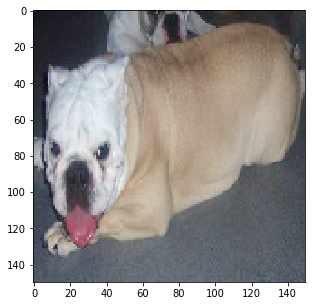

In [30]:
from matplotlib import pyplot

pyplot.figure(figsize = (5, 5))
pyplot.imshow(img_array[0])

## Visualizing intermediate activations

In [32]:
model.layers[0].layers

In [45]:
# Enumerating the output of each layer
layer_output = [layer.output for layer in model.layers[0].layers]

# Specifying a model handler with multiple outputs
model_activation = tf.keras.Model(inputs = model.layers[0].input, outputs = layer_output)

In [46]:
# This is an example of a single input/ multi output model. There will be as many outputs as len(layer_output)
activations = model_activation.predict(img_array)

In [66]:
# Example of how the image will change while pumped throught the network
for x in activations[:4]:
    print(x.shape)

(1, 150, 150, 3)
(1, 150, 150, 64)
(1, 150, 150, 64)
(1, 75, 75, 64)


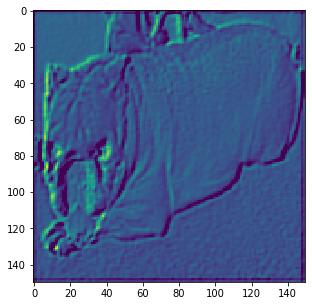

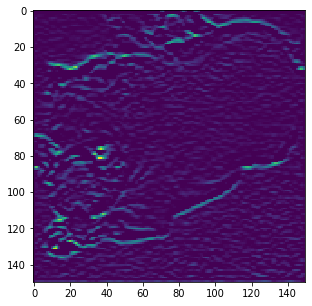

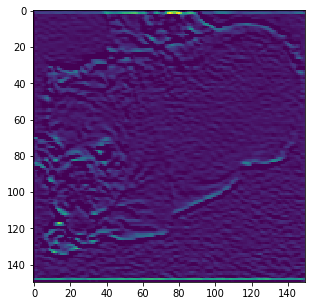

In [120]:
activations_second_layer = activations[2]
# activations_second_layer[0][:,:, 1].shape

# Let's define a function to plot a given activation channel

def plot_channel(activation_layer_number, channel_number):
    pyplot.figure(figsize = (5, 5))
    pyplot.imshow(activations[activation_layer_number][0][:,:, channel_number])

plot_channel(2, 1)
plot_channel(2, 20)
plot_channel(2, 50)

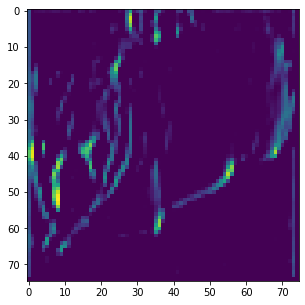

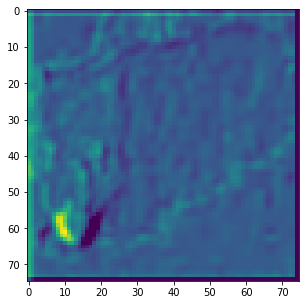

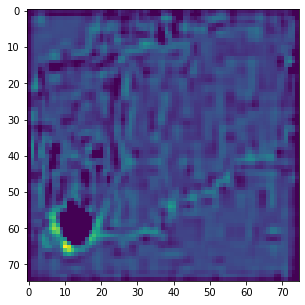

In [121]:
plot_channel(5, 1)
plot_channel(5, 20)
plot_channel(5, 50)

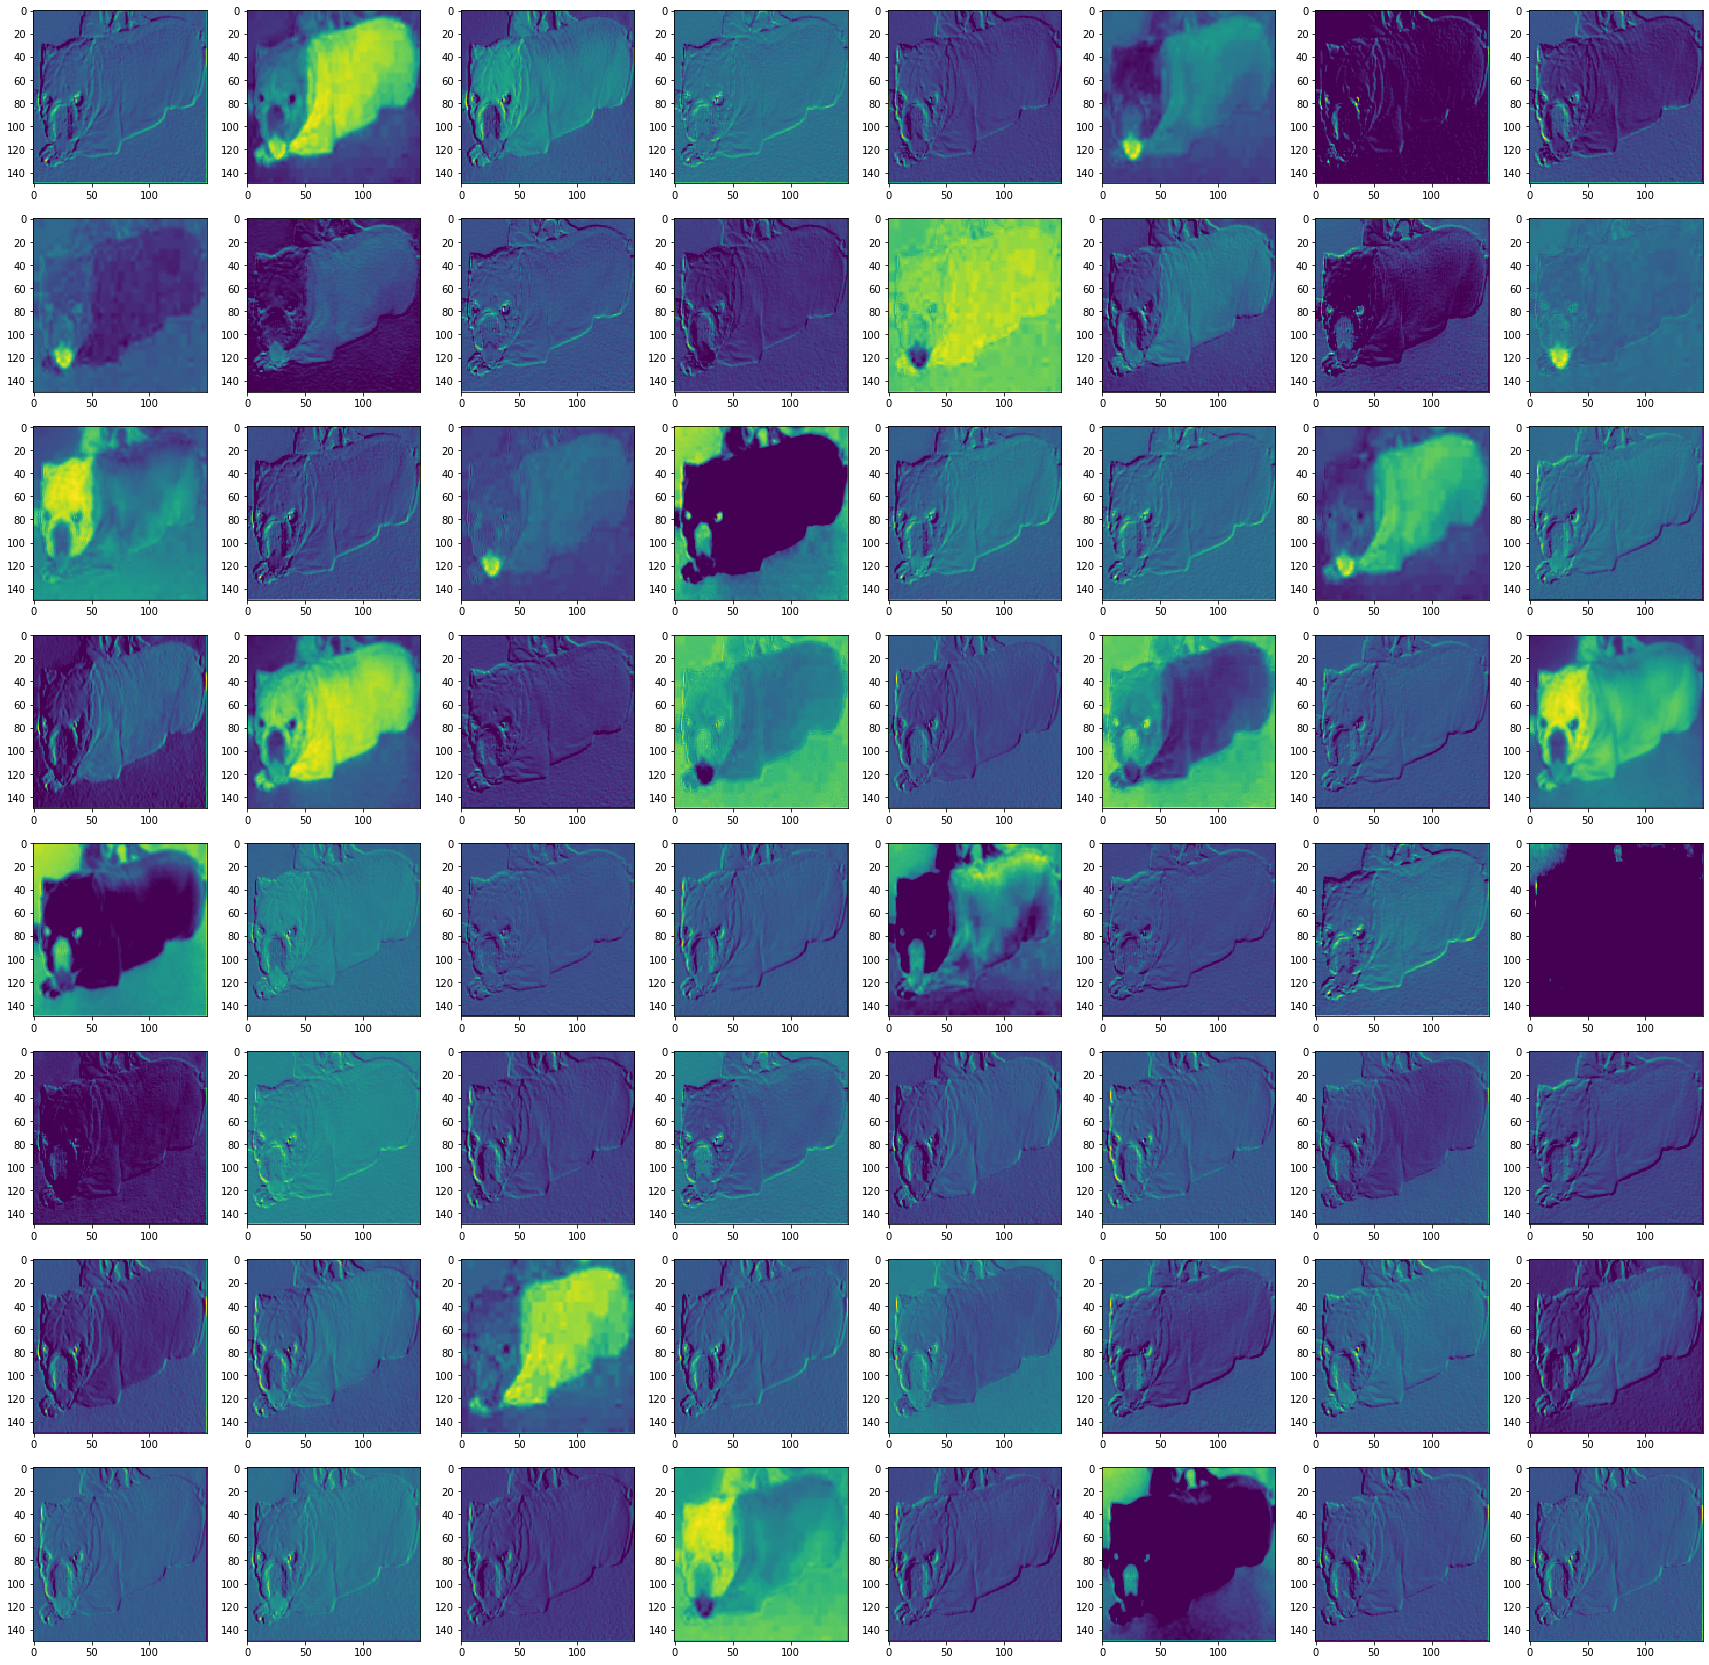

In [124]:
# Calling this beforehand applies then to the entire grid that will be printed
import math

pyplot.figure(figsize = (30, 30))
n_layer = 1
n_channels = activations[n_layer][0].shape[2]
dim = math.ceil(math.sqrt(n_channels))

for i in range(n_channels): # as many images as channels
    pyplot.subplot(dim, dim, i + 1)
    pyplot.imshow(activations[n_layer][0][:,:, i])
pyplot.show()

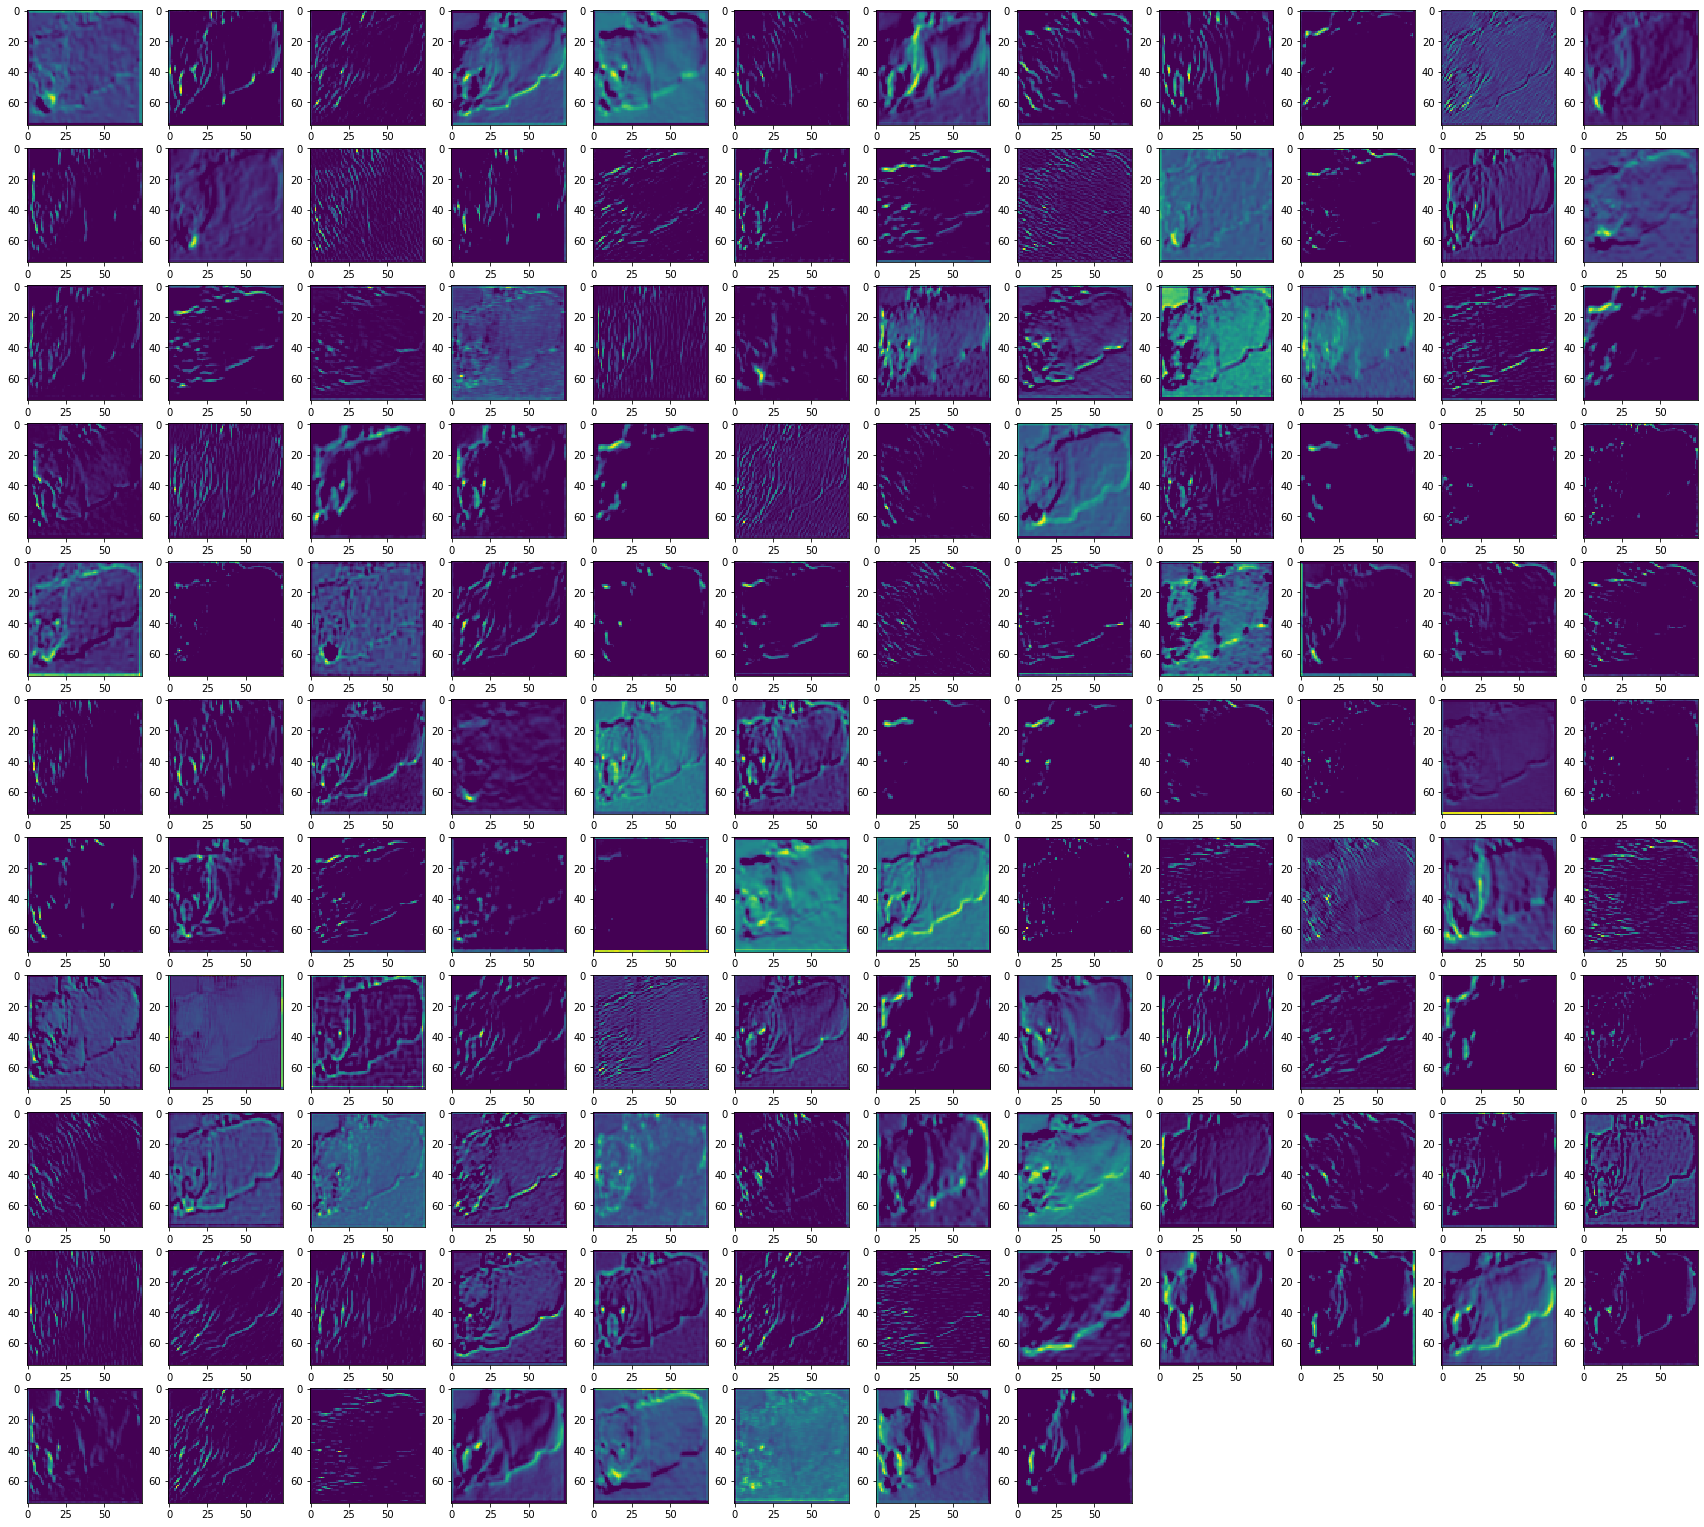

In [125]:
pyplot.figure(figsize = (30, 30))
n_layer = 5
n_channels = activations[n_layer][0].shape[2]
dim = math.ceil(math.sqrt(n_channels))

for i in range(n_channels): # as many images as channels
    pyplot.subplot(dim, dim, i + 1)
    pyplot.imshow(activations[n_layer][0][:,:, i])
pyplot.show()